In [1]:
import pandas as pd

In [55]:
positions = pd.read_csv("/content/positions.csv")
positions.head()

date_number  product_id  category_id  position
0            0     4450020      4461548        17
1            0    42147334      4461548         4
2            0    81131830      4461548        35
3            0    84035833      4461548        38
4            0   125252584      4461548        39

In [3]:
product_blocks = pd.read_csv("/content/product_blocks.csv")
product_blocks.head()

version https://git-lfs.github.com/spec/v1
0  oid sha256:0e47c17b16f124cc27891a353ec6b422758...
1                                        size 220785

In [5]:
products = pd.read_csv("/content/products.csv")
products.head()

product_id  family_id  subfamily_id  price
0      151926  396066037     335531561  25.95
1      213413  552529755      11509337  19.95
2      310130  679611953     533441312  12.95
3      373883  775013441      62518413  17.95
4      455200  998145072     490222156  29.95

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15238 entries, 0 to 15237
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    15238 non-null  int64  
 1   family_id     15238 non-null  int64  
 2   subfamily_id  15238 non-null  int64  
 3   price         15238 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 476.3 KB


In [7]:
sales = pd.read_csv("/content/sales_stock.csv")
sales.head()

date_number  product_id  color_id    size_id  sales  stock
0            0      310130  78467031    7026791      1     93
1            0      310130  78467031    8015276      2     62
2            0      310130  78467031  452052101      1     18
3            0      310130  78467031  541898038      2     42
4            0      310130  78467031  558685710      3    113

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736218 entries, 0 to 3736217
Data columns (total 6 columns):
 #   Column       Dtype
---  ------       -----
 0   date_number  int64
 1   product_id   int64
 2   color_id     int64
 3   size_id      int64
 4   sales        int64
 5   stock        int64
dtypes: int64(6)
memory usage: 171.0 MB


In [9]:
all_data = products.merge(sales, how='outer', on='product_id')
all_data.head()

product_id  family_id  subfamily_id  price  date_number     color_id  \
0      151926  396066037     335531561  25.95         59.0  909958217.0   
1      151926  396066037     335531561  25.95         59.0  909958217.0   
2      151926  396066037     335531561  25.95         59.0  909958217.0   
3      151926  396066037     335531561  25.95         59.0  909958217.0   
4      151926  396066037     335531561  25.95         60.0  909958217.0   

       size_id  sales  stock  
0  111455099.0    0.0   17.0  
1  242364222.0    3.0   63.0  
2  513017386.0    1.0   33.0  
3  820445075.0    1.0   42.0  
4   54666687.0    2.0   72.0

In [10]:
clean_data = all_data[['product_id','color_id','size_id','price','sales','stock']]
clean_data.head()

product_id     color_id      size_id  price  sales  stock
0      151926  909958217.0  111455099.0  25.95    0.0   17.0
1      151926  909958217.0  242364222.0  25.95    3.0   63.0
2      151926  909958217.0  513017386.0  25.95    1.0   33.0
3      151926  909958217.0  820445075.0  25.95    1.0   42.0
4      151926  909958217.0   54666687.0  25.95    2.0   72.0

In [11]:
data_by_product_id = sales[['product_id','sales','stock']].groupby(by='product_id').sum()
data_by_product_id

sales  stock
product_id              
151926        167   7995
213413        757  56646
310130        578  49639
455200         24   2258
571044        591  18868
...           ...    ...
999772605     183   6337
999794342      28   2502
999816749     496  32997
999862351     135  11683
999936664      61  21523

[9595 rows x 2 columns]

In [12]:
products['product_id'].nunique()

15238

In [13]:
data_by_product_id = data_by_product_id.merge(products[['product_id','price']], on='product_id')
data_by_product_id

product_id  sales  stock  price
0         151926    167   7995  25.95
1         213413    757  56646  19.95
2         310130    578  49639  12.95
3         455200     24   2258  29.95
4         571044    591  18868  15.95
...          ...    ...    ...    ...
9590   999772605    183   6337  15.95
9591   999794342     28   2502  29.95
9592   999816749    496  32997   5.95
9593   999862351    135  11683  25.95
9594   999936664     61  21523  15.95

[9595 rows x 4 columns]

In [14]:
data_by_product_id['sales%'] = data_by_product_id['sales']/(data_by_product_id['stock'])*100
data_by_product_id

product_id  sales  stock  price    sales%
0         151926    167   7995  25.95  2.088806
1         213413    757  56646  19.95  1.336370
2         310130    578  49639  12.95  1.164407
3         455200     24   2258  29.95  1.062888
4         571044    591  18868  15.95  3.132287
...          ...    ...    ...    ...       ...
9590   999772605    183   6337  15.95  2.887802
9591   999794342     28   2502  29.95  1.119105
9592   999816749    496  32997   5.95  1.503167
9593   999862351    135  11683  25.95  1.155525
9594   999936664     61  21523  15.95  0.283418

[9595 rows x 5 columns]

In [15]:
data_by_product_id.reset_index(inplace=True)

<Axes: xlabel='index'>

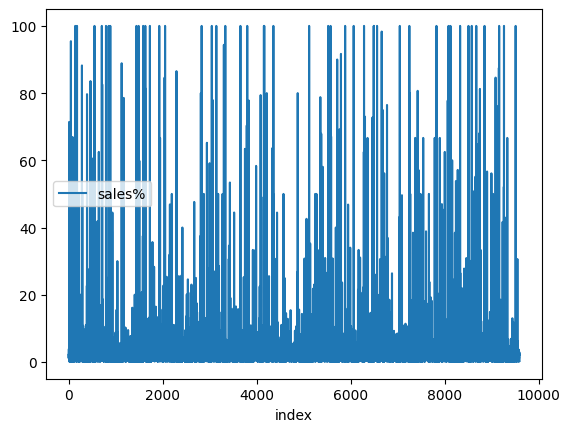

In [16]:
data_by_product_id.plot('index','sales%',kind='line')

In [17]:
max(data_by_product_id['sales%'])

100.0

In [18]:
best_sellers = data_by_product_id.loc[data_by_product_id['sales%']>=50.00,:]
best_sellers

index  product_id  sales  stock  price      sales%
12       12     1042445      5      7  49.99   71.428571
48       48     5551656     42     44  17.95   95.454545
70       70     7944101     13     23  22.95   56.521739
84       84     9593020    162    242  15.99   66.942149
140     140    15254736      1      1  29.95  100.000000
...     ...         ...    ...    ...    ...         ...
9160   9160   953625487      2      2  19.95  100.000000
9260   9260   964015004    430    825  29.95   52.121212
9263   9263   964340982      3      3  29.95  100.000000
9333   9333   973116514      2      3  22.95   66.666667
9511   9511   990089720      1      1  19.95  100.000000

[146 rows x 6 columns]

In [19]:
top_sellers = data_by_product_id.loc[data_by_product_id['sales%']>=85.00,:]
top_sellers

index  product_id  sales  stock  price      sales%
48       48     5551656     42     44  17.95   95.454545
140     140    15254736      1      1  29.95  100.000000
178     178    18904572     16     16  15.99  100.000000
283     283    30446049     15     17  25.95   88.235294
550     550    57726281      9      9  59.95  100.000000
706     706    75650747      7      7  15.95  100.000000
795     795    83898732     39     39  22.95  100.000000
851     851    88418520      4      4  19.95  100.000000
886     886    91970168      1      1  25.95  100.000000
1128   1128   116880754      8      9  19.95   88.888889
1442   1442   148858976      2      2  79.95  100.000000
1489   1489   153954672      1      1   9.95  100.000000
1585   1585   163507094      3      3  39.95  100.000000
1631   1631   168456948      1      1  29.95  100.000000
1729   1729   179757204      2      2  15.95  100.000000
1928   1928   200404985      2      2  15.95  100.000000
2052   2052   213981340      6      6   4.95  100.000000
2294   2294   239266786     45     52  22.95   86.538462
2830   2830   291371514      3      3  19.95  100.000000
3046   3046   313459098      2      2  29.95  100.000000
3142   3142   324048731      1      1  29.95  100.000000
3303   3303   339336529    352    373  79.95   94.369973
3333   3333   342893636      2      2  19.95  100.000000
3655   3655   376306003     17     17   9.95  100.000000
3800   3800   391934045      6      6  19.95  100.000000
4155   4155   429212947      1      1  19.95  100.000000
4162   4162   430056146      1      1  59.95  100.000000
4356   4356   448754884      3      3   9.95  100.000000
5117   5117   528746868      3      3  29.95  100.000000
5522   5522   571527142      3      3   9.95  100.000000
5573   5573   578187569      1      1  22.95  100.000000
5714   5714   592505586      9     10   7.95   90.000000
5794   5794   604849196     11     12   9.99   91.666667
5883   5883   614536745      1      1  59.95  100.000000
6065   6065   634338873      2      2  22.95  100.000000
6285   6285   655588402      1      1  59.95  100.000000
6493   6493   676616171      1      1   9.95  100.000000
6496   6496   677078905      1      1   9.95  100.000000
6562   6562   683556260      1      1  12.95  100.000000
6661   6661   693409362    117    119  39.95   98.319328
7046   7046   733495221      2      2   5.95  100.000000
7249   7249   754673295     64     64  25.95  100.000000
7826   7826   812642645      3      3  25.95  100.000000
8083   8083   839551181      4      4  29.95  100.000000
8109   8109   841516717     38     42  29.95   90.476190
8124   8124   843348404      1      1  25.95  100.000000
8329   8329   866149997      3      3  29.99  100.000000
8507   8507   885942584      1      1  19.95  100.000000
8577   8577   892432778     39     39  25.95  100.000000
8673   8673   901749514      2      2   9.95  100.000000
8849   8849   922168991     12     12  29.99  100.000000
9154   9154   952838504      7      8  25.95   87.500000
9160   9160   953625487      2      2  19.95  100.000000
9263   9263   964340982      3      3  29.95  100.000000
9511   9511   990089720      1      1  19.95  100.000000

In [20]:
sales['date_number'].value_counts()

78    48326
73    48306
79    48251
74    48160
77    48025
      ...  
6     29577
3     29377
1     28810
2     28723
0     28105
Name: date_number, Length: 92, dtype: int64

In [21]:
sales.tail()

date_number  product_id   color_id    size_id  sales  stock
3736213           91   999936664  842213539  541898038      0     31
3736214           91   999936664  842213539  704351195      0     34
3736215           91   999936664  842213539  727657238      0     34
3736216           91   999936664  842213539  792872119      0     23
3736217           91   999936664  842213539  912547955      0     32

In [22]:
dates_df = pd.DataFrame(sales['date_number'].value_counts())
dates_df.reset_index(inplace=True)

In [23]:
dates_df

index  date_number
0      78        48326
1      73        48306
2      79        48251
3      74        48160
4      77        48025
..    ...          ...
87      6        29577
88      3        29377
89      1        28810
90      2        28723
91      0        28105

[92 rows x 2 columns]

In [24]:
dates_df.sort_values(by='index', inplace=True)

In [30]:
dates_df

day  sales
91    0  28105
89    1  28810
90    2  28723
88    3  29377
86    4  29764
..  ...    ...
29   87  45655
27   88  45767
33   89  44719
35   90  44322
38   91  43583

[92 rows x 2 columns]

In [29]:
dates_df.rename(columns={'index':'day','date_number':'sales'},inplace=True)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

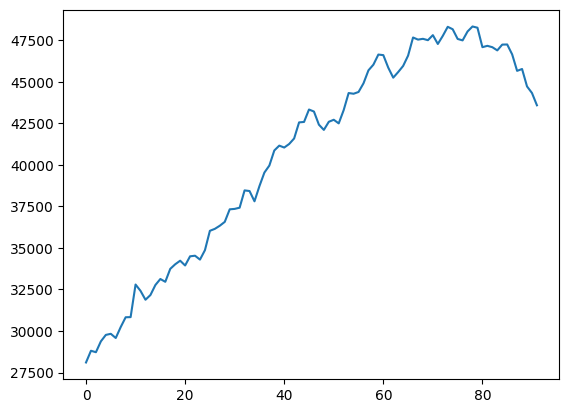

In [35]:
plt.plot(dates_df['day'],dates_df['sales'])

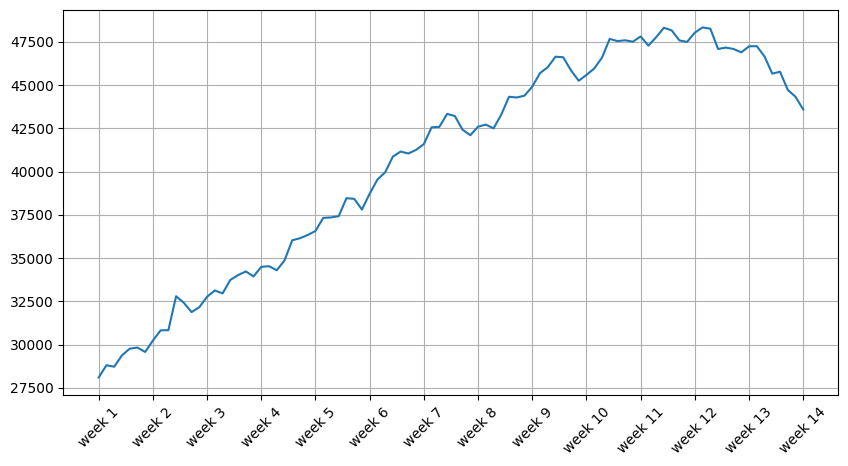

In [46]:
plt.figure(figsize=(10, 5)) 
plt.plot(dates_df['day'],dates_df['sales'])
weekly_ticks = np.arange(0,92,7)
weekly_labels = []
for i in range(14):
  weekly_labels.append(f'week {i+1}')
plt.xticks(ticks=weekly_ticks,labels=weekly_labels,rotation=45)
plt.grid()

<Axes: xlabel='day'>

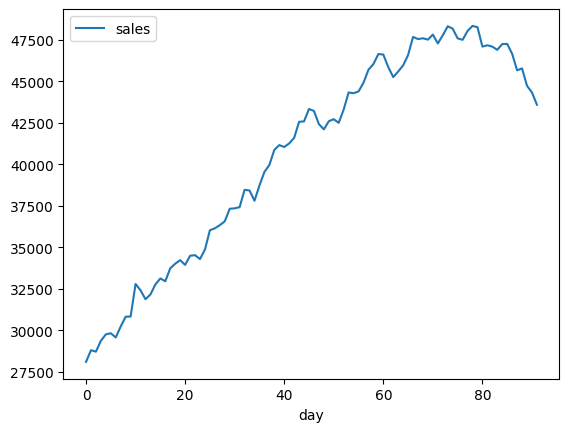

In [31]:
dates_df.plot(x='day',y='sales',kind='line',)

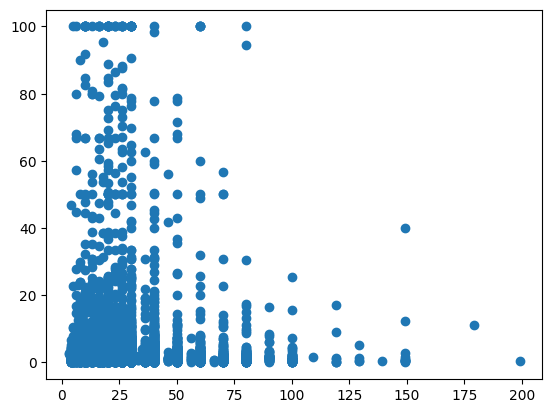

In [48]:
plt.scatter(data_by_product_id['price'],data_by_product_id['sales%'])

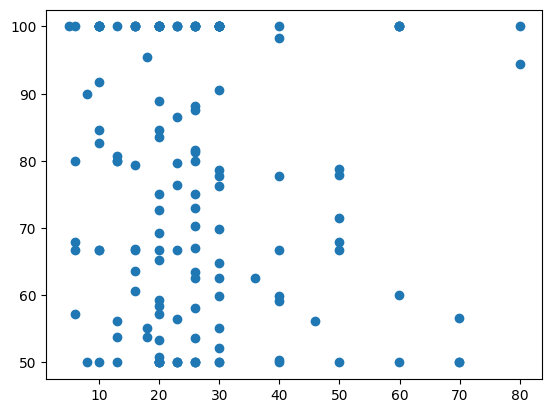

In [49]:
plt.scatter(best_sellers['price'],best_sellers['sales%'])

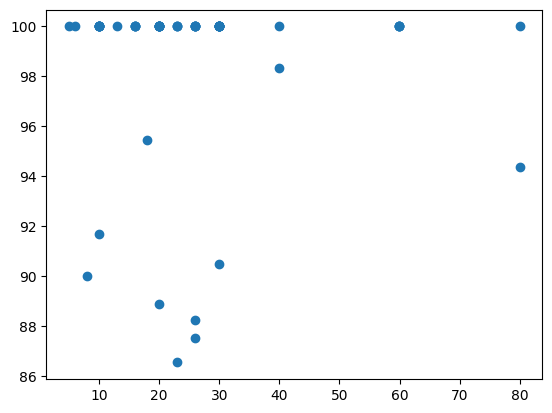

In [50]:
plt.scatter(top_sellers['price'], top_sellers['sales%'])

In [51]:
data_by_color_id = sales[['color_id','sales','stock']].groupby(by='color_id').sum()
data_by_color_id

sales    stock
color_id                 
2230471       13       30
9348550      206     4013
10926303   12137   830486
11897479     211     3414
17191690      79     2157
...          ...      ...
975096365    303    18351
983692003    419     6977
994543566  20806  1479486
995985451     28     1110
996437683   1668   132873

[360 rows x 2 columns]

In [52]:
data_by_color_id['sales%'] = data_by_color_id['sales']/(data_by_color_id['stock'])*100
data_by_color_id

sales    stock     sales%
color_id                            
2230471       13       30  43.333333
9348550      206     4013   5.133317
10926303   12137   830486   1.461433
11897479     211     3414   6.180434
17191690      79     2157   3.662494
...          ...      ...        ...
975096365    303    18351   1.651136
983692003    419     6977   6.005446
994543566  20806  1479486   1.406299
995985451     28     1110   2.522523
996437683   1668   132873   1.255334

[360 rows x 3 columns]

In [53]:
data_by_color_id.reset_index(inplace=True)

In [54]:
data_by_color_id

color_id  sales    stock     sales%
0      2230471     13       30  43.333333
1      9348550    206     4013   5.133317
2     10926303  12137   830486   1.461433
3     11897479    211     3414   6.180434
4     17191690     79     2157   3.662494
..         ...    ...      ...        ...
355  975096365    303    18351   1.651136
356  983692003    419     6977   6.005446
357  994543566  20806  1479486   1.406299
358  995985451     28     1110   2.522523
359  996437683   1668   132873   1.255334

[360 rows x 4 columns]

In [57]:
all_data.head(30)

product_id  family_id  subfamily_id  price  date_number     color_id  \
0       151926  396066037     335531561  25.95         59.0  909958217.0   
1       151926  396066037     335531561  25.95         59.0  909958217.0   
2       151926  396066037     335531561  25.95         59.0  909958217.0   
3       151926  396066037     335531561  25.95         59.0  909958217.0   
4       151926  396066037     335531561  25.95         60.0  909958217.0   
5       151926  396066037     335531561  25.95         60.0  909958217.0   
6       151926  396066037     335531561  25.95         60.0  909958217.0   
7       151926  396066037     335531561  25.95         60.0  909958217.0   
8       151926  396066037     335531561  25.95         60.0  909958217.0   
9       151926  396066037     335531561  25.95         61.0  909958217.0   
10      151926  396066037     335531561  25.95         61.0  909958217.0   
11      151926  396066037     335531561  25.95         61.0  909958217.0   
12      151926  396066037     335531561  25.95         61.0  909958217.0   
13      151926  396066037     335531561  25.95         61.0  909958217.0   
14      151926  396066037     335531561  25.95         62.0  909958217.0   
15      151926  396066037     335531561  25.95         62.0  909958217.0   
16      151926  396066037     335531561  25.95         62.0  909958217.0   
17      151926  396066037     335531561  25.95         62.0  909958217.0   
18      151926  396066037     335531561  25.95         62.0  909958217.0   
19      151926  396066037     335531561  25.95         63.0  909958217.0   
20      151926  396066037     335531561  25.95         63.0  909958217.0   
21      151926  396066037     335531561  25.95         63.0  909958217.0   
22      151926  396066037     335531561  25.95         63.0  909958217.0   
23      151926  396066037     335531561  25.95         63.0  909958217.0   
24      151926  396066037     335531561  25.95         64.0  909958217.0   
25      151926  396066037     335531561  25.95         64.0  909958217.0   
26      151926  396066037     335531561  25.95         64.0  909958217.0   
27      151926  396066037     335531561  25.95         64.0  909958217.0   
28      151926  396066037     335531561  25.95         64.0  909958217.0   
29      151926  396066037     335531561  25.95         65.0  909958217.0   

        size_id  sales  stock  
0   111455099.0    0.0   17.0  
1   242364222.0    3.0   63.0  
2   513017386.0    1.0   33.0  
3   820445075.0    1.0   42.0  
4    54666687.0    2.0   72.0  
5   111455099.0    2.0   21.0  
6   242364222.0    2.0   95.0  
7   513017386.0    1.0   46.0  
8   820445075.0    3.0   96.0  
9    54666687.0    2.0   69.0  
10  111455099.0    0.0   18.0  
11  242364222.0    2.0   89.0  
12  513017386.0    2.0   43.0  
13  820445075.0    3.0   89.0  
14   54666687.0    1.0   65.0  
15  111455099.0    1.0   18.0  
16  242364222.0    4.0   85.0  
17  513017386.0    2.0   38.0  
18  820445075.0    1.0   83.0  
19   54666687.0    0.0   61.0  
20  111455099.0    0.0   16.0  
21  242364222.0    1.0   77.0  
22  513017386.0    1.0   32.0  
23  820445075.0    6.0   75.0  
24   54666687.0    0.0   61.0  
25  111455099.0    0.0   16.0  
26  242364222.0    1.0   72.0  
27  513017386.0    2.0   30.0  
28  820445075.0    4.0   65.0  
29   54666687.0    1.0   59.0

In [58]:
clean_data['sales%'] = clean_data['sales']/(clean_data['stock'])*100
clean_data

<ipython-input-58-f49d40c03a96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['sales%'] = clean_data['sales']/(clean_data['stock'])*100


product_id     color_id      size_id  price  sales  stock    sales%
0            151926  909958217.0  111455099.0  25.95    0.0   17.0  0.000000
1            151926  909958217.0  242364222.0  25.95    3.0   63.0  4.761905
2            151926  909958217.0  513017386.0  25.95    1.0   33.0  3.030303
3            151926  909958217.0  820445075.0  25.95    1.0   42.0  2.380952
4            151926  909958217.0   54666687.0  25.95    2.0   72.0  2.777778
...             ...          ...          ...    ...    ...    ...       ...
3741856   999936664  842213539.0  541898038.0  15.95    0.0   31.0  0.000000
3741857   999936664  842213539.0  704351195.0  15.95    0.0   34.0  0.000000
3741858   999936664  842213539.0  727657238.0  15.95    0.0   34.0  0.000000
3741859   999936664  842213539.0  792872119.0  15.95    0.0   23.0  0.000000
3741860   999936664  842213539.0  912547955.0  15.95    0.0   32.0  0.000000

[3741861 rows x 7 columns]

In [63]:
product_id_list = clean_data['product_id'].unique()
product_id_list[0]

151926

In [80]:
best_color_list = []
for id in product_id_list:
  df = clean_data.loc[clean_data['product_id']==id,:]
  df2 = df.loc[df['sales%']==max(df['sales%']),:]
  dictt = {'color_id': df2['color_id'],'size_id': df2['size_id'],'price': df2['price'],'sales': df2['sales'],'stock': df2['stock'],'sales%': df2['sales%']}
  best_color_list.append(dictt)

In [83]:
df3 = pd.DataFrame(columns = ["product_id", "color_id", "size_id","price","sales","stock","sales%"])
for id in product_id_list:
  df = clean_data.loc[clean_data['product_id']==id,:]
  df3 = pd.concat([df3, df[df['sales%'] == max(df['sales%'])]])

In [90]:
df3.drop_duplicates(subset=['product_id','size_id','color_id'],keep='first',inplace=True)

#This dataframe has the best seller color and size combination for each unique product_id.

In [91]:
df3

product_id     color_id      size_id  price  sales  stock      sales%
100         151926  909958217.0  111455099.0  25.95    3.0    6.0   50.000000
214         213413  271590995.0  422108434.0  19.95    2.0   15.0   13.333333
1160        310130   78467031.0  541898038.0  12.95    2.0    9.0   22.222222
1402        455200  649181039.0  111455099.0  29.95    3.0    9.0   33.333333
1642        571044  735224030.0  111455099.0  15.95    2.0    2.0  100.000000
...            ...          ...          ...    ...    ...    ...         ...
3740256  999816749  362052510.0  558685710.0   5.95    1.0    1.0  100.000000
3740375  999816749  362052510.0    7026791.0   5.95    2.0    2.0  100.000000
3740392  999862351  429279321.0  111455099.0  25.95    1.0    1.0  100.000000
3740396  999862351  842213539.0  820445075.0  25.95    1.0    1.0  100.000000
3741205  999936664  842213539.0  111455099.0  15.95    2.0   23.0    8.695652

[25204 rows x 7 columns]

In [92]:
df3_best_sellers = df3.loc[df3['sales%']>=85,:]
df3_best_sellers

product_id     color_id      size_id  price  sales  stock  sales%
1642        571044  735224030.0  111455099.0  15.95    2.0    2.0   100.0
1882        571044  735224030.0  513017386.0  15.95    1.0    1.0   100.0
1978        571044  665237982.0  242364222.0  15.95    3.0    3.0   100.0
1998        571044  735224030.0  242364222.0  15.95    4.0    4.0   100.0
1999        571044  735224030.0  820445075.0  15.95    2.0    2.0   100.0
...            ...          ...          ...    ...    ...    ...     ...
3740251  999816749  362052510.0  843639151.0   5.95    1.0    1.0   100.0
3740256  999816749  362052510.0  558685710.0   5.95    1.0    1.0   100.0
3740375  999816749  362052510.0    7026791.0   5.95    2.0    2.0   100.0
3740392  999862351  429279321.0  111455099.0  25.95    1.0    1.0   100.0
3740396  999862351  842213539.0  820445075.0  25.95    1.0    1.0   100.0

[19975 rows x 7 columns]

In [93]:
df3_best_sellers['stock'].value_counts()

1.0      11152
2.0       3652
3.0       1623
4.0        953
5.0        588
         ...  
72.0         1
84.0         1
124.0        1
87.0         1
73.0         1
Name: stock, Length: 84, dtype: int64

In [94]:
df3_best_sellers_clean = df3_best_sellers.loc[df3_best_sellers['stock']>50,:]
df3_best_sellers_clean

product_id     color_id      size_id  price  sales  stock  sales%
174442    47649748  744479403.0  242364222.0  19.95   87.0   87.0   100.0
174447    47649748  744479403.0  820445075.0  19.95  124.0  124.0   100.0
260999    73474899  149270693.0  820445075.0  12.95   61.0   61.0   100.0
261001    73474899  477858656.0  820445075.0  12.95   58.0   58.0   100.0
313585    85512207  429279321.0    7026791.0   5.95   57.0   57.0   100.0
402680   109316063  859479207.0  941322277.0  25.95   56.0   56.0   100.0
595426   159381458  544880853.0  820445075.0  15.95   84.0   84.0   100.0
628591   169063936   78467031.0  843639151.0  12.95   79.0   79.0   100.0
644700   173860885   78467031.0  242364222.0  12.95   72.0   72.0   100.0
644704   173860885  654679495.0  242364222.0  12.95   52.0   52.0   100.0
644707   173860885  654679495.0  820445075.0  12.95   78.0   78.0   100.0
649808   175862536  735224030.0  242364222.0  12.95   57.0   57.0   100.0
649810   175862536  735224030.0  820445075.0  12.95   76.0   76.0   100.0
753339   203958447   38379663.0  820445075.0  29.95   74.0   74.0   100.0
753342   203958447   51733619.0  820445075.0  29.95  155.0  155.0   100.0
860713   231862828  473173976.0  242364222.0  39.95   52.0   52.0   100.0
919017   245197898  744479403.0  558685710.0   3.95   59.0   59.0   100.0
927249   247063103  744479403.0  820445075.0  19.95   53.0   53.0   100.0
972978   259016931  429279321.0  242364222.0  19.95  262.0  262.0   100.0
1157706  309984210  665237982.0   54666687.0  25.95   58.0   58.0   100.0
1157713  309984210  735224030.0  242364222.0  25.95   54.0   54.0   100.0
1157715  309984210  735224030.0  820445075.0  25.95   61.0   61.0   100.0
1450442  385282210  735224030.0  242364222.0  25.95   79.0   79.0   100.0
1506719  400308675  665237982.0  558685710.0  22.95   57.0   57.0   100.0
1506725  400308675  735224030.0  558685710.0  22.95  152.0  152.0   100.0
1506727  400308675  735224030.0  674701524.0  22.95   58.0   58.0   100.0
1544940  412199603  718368786.0  558685710.0   9.95   97.0   97.0   100.0
1598152  427522176  665237982.0  242364222.0  12.95   77.0   77.0   100.0
1828857  486354287   32598062.0  242364222.0  15.95   69.0   69.0   100.0
1828865  486354287  735224030.0  820445075.0  15.95   59.0   59.0   100.0
1940802  519521021  431126416.0    8015276.0   7.95   71.0   71.0   100.0
2026233  547283192  617064550.0  242364222.0  25.95   55.0   55.0   100.0
2054097  555278269  744479403.0  820445075.0  49.95   88.0   88.0   100.0
2054100  555278269  744479403.0  242364222.0  49.95   61.0   61.0   100.0
2060170  556775487  473173976.0  820445075.0  25.95   78.0   78.0   100.0
2192265  590634596  444220004.0  820445075.0  12.95   61.0   61.0   100.0
2344149  638342517   32598062.0  242364222.0  17.95  106.0  106.0   100.0
2344152  638342517  819595309.0  242364222.0  17.95  135.0  135.0   100.0
2344154  638342517  819595309.0  820445075.0  17.95  128.0  128.0   100.0
2426106  658235806  444220004.0  820445075.0  25.95   91.0   91.0   100.0
2616343  704205080  617064550.0  242364222.0  12.95   60.0   60.0   100.0
2735489  738782203  665237982.0  242364222.0  19.95   51.0   51.0   100.0
2758690  743085239  654679495.0  820445075.0  29.95   58.0   58.0   100.0
2765275  744651212  444220004.0  242364222.0  19.95   53.0   53.0   100.0
2765277  744651212  444220004.0  820445075.0  19.95   54.0   54.0   100.0
2885854  776356585  131040921.0  820445075.0  12.95   53.0   53.0   100.0
3123421  837438273  970404272.0  820445075.0  15.95   56.0   56.0   100.0
3137689  841624427  280124428.0  820445075.0  25.95   69.0   69.0   100.0
3137691  841624427  735224030.0  513017386.0  25.95   63.0   63.0   100.0
3137695  841624427  735224030.0  820445075.0  25.95   56.0   56.0   100.0
3431318  921521142  744479403.0  820445075.0  29.95   75.0   75.0   100.0
3642704  978117283  735224030.0  820445075.0  25.95   73.0   73.0   100.0
3654771  979799762  491503397.0  242364222.0  15.95   71.0   71.0   100.0

In [95]:
df3_best_sellers_clean['product_id'].value_counts()

309984210    3
841624427    3
638342517    3
173860885    3
400308675    3
47649748     2
744651212    2
555278269    2
73474899     2
486354287    2
203958447    2
175862536    2
245197898    1
159381458    1
978117283    1
921521142    1
85512207     1
837438273    1
776356585    1
109316063    1
743085239    1
738782203    1
704205080    1
658235806    1
590634596    1
247063103    1
556775487    1
169063936    1
547283192    1
519521021    1
427522176    1
412199603    1
385282210    1
231862828    1
259016931    1
979799762    1
Name: product_id, dtype: int64

In [96]:
df3_best_sellers_clean['color_id'].value_counts()

735224030.0    11
744479403.0     7
444220004.0     4
665237982.0     4
654679495.0     3
819595309.0     2
617064550.0     2
32598062.0      2
473173976.0     2
78467031.0      2
429279321.0     2
38379663.0      1
51733619.0      1
149270693.0     1
718368786.0     1
544880853.0     1
431126416.0     1
859479207.0     1
477858656.0     1
131040921.0     1
970404272.0     1
280124428.0     1
491503397.0     1
Name: color_id, dtype: int64

In [97]:
df3_best_sellers_clean['size_id'].value_counts()

820445075.0    24
242364222.0    18
558685710.0     4
7026791.0       1
941322277.0     1
843639151.0     1
54666687.0      1
674701524.0     1
8015276.0       1
513017386.0     1
Name: size_id, dtype: int64

In [98]:
df3_best_sellers_clean['price'].value_counts()

12.95    12
25.95    12
19.95     7
15.95     5
29.95     4
22.95     3
17.95     3
49.95     2
5.95      1
39.95     1
3.95      1
9.95      1
7.95      1
Name: price, dtype: int64

<ipython-input-100-4c324c0f7124>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df3_best_sellers_clean.corr())


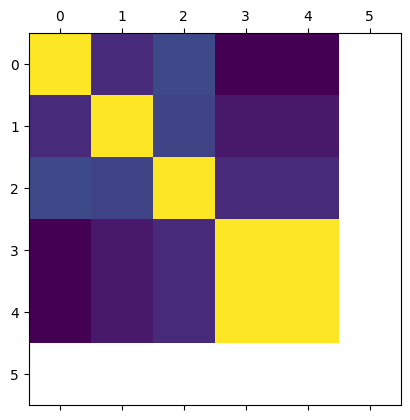

In [100]:
plt.matshow(df3_best_sellers_clean.corr())
plt.show()

<ipython-input-102-190549c03673>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df3.corr(), annot=True)


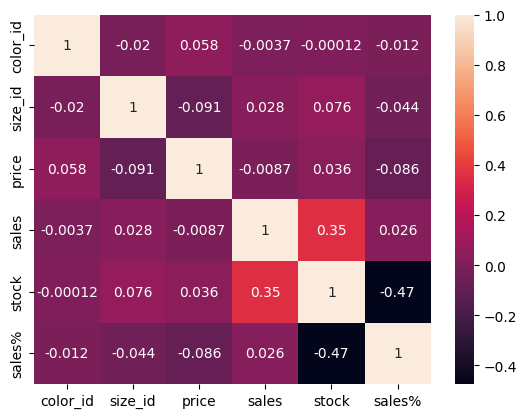

In [102]:
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset
#flights = sns.load_dataset("flights")
 
#plotting the heatmap for correlation
ax = sns.heatmap(df3.corr(), annot=True)

In [103]:
day_one = all_data.loc[all_data['date_number']==0,:]
day_one

product_id  family_id  subfamily_id  price  date_number     color_id  \
786          310130  679611953     533441312  12.95          0.0   78467031.0   
787          310130  679611953     533441312  12.95          0.0   78467031.0   
788          310130  679611953     533441312  12.95          0.0   78467031.0   
789          310130  679611953     533441312  12.95          0.0   78467031.0   
790          310130  679611953     533441312  12.95          0.0   78467031.0   
...             ...        ...           ...    ...          ...          ...   
3741128   999936664  396066037     739564025  15.95          0.0  842213539.0   
3741129   999936664  396066037     739564025  15.95          0.0  842213539.0   
3741130   999936664  396066037     739564025  15.95          0.0  842213539.0   
3741131   999936664  396066037     739564025  15.95          0.0  842213539.0   
3741132   999936664  396066037     739564025  15.95          0.0  842213539.0   

             size_id  sales  stock  
786        7026791.0    1.0   93.0  
787        8015276.0    2.0   62.0  
788      452052101.0    1.0   18.0  
789      541898038.0    2.0   42.0  
790      558685710.0    3.0  113.0  
...              ...    ...    ...  
3741128  541898038.0    0.0   45.0  
3741129  704351195.0    2.0   29.0  
3741130  727657238.0    1.0   38.0  
3741131  792872119.0    0.0   26.0  
3741132  912547955.0    1.0   44.0  

[28105 rows x 9 columns]

In [104]:
day_one['product_id'].value_counts()

848832888    57
229677225    56
740562589    56
377100361    45
472667200    42
             ..
812194994     1
40895502      1
638566358     1
464365087     1
801141226     1
Name: product_id, Length: 4699, dtype: int64

In [106]:
day_one_product = day_one[['product_id','sales','stock']].groupby(by='product_id').sum()
day_one_product['sales%'] = day_one_product['sales']/(day_one_product['stock'])*100
day_one_product.reset_index(inplace=True)
day_one_product

product_id  sales  stock     sales%
0         310130   11.0  461.0   2.386117
1        1178388    0.0   60.0   0.000000
2        1561460    7.0  791.0   0.884956
3        1874414    4.0  281.0   1.423488
4        2436420    0.0  245.0   0.000000
...          ...    ...    ...        ...
4694   999516715    7.0  221.0   3.167421
4695   999794342    0.0   58.0   0.000000
4696   999816749    6.0  453.0   1.324503
4697   999862351    3.0   17.0  17.647059
4698   999936664    5.0  270.0   1.851852

[4699 rows x 4 columns]

In [107]:
sum(day_one_product['sales%'])

18127.0576103919

In [113]:
day_one_product_best = day_one_product.loc[day_one_product['stock']>300,:]
day_one_product_best

product_id  sales   stock    sales%
0         310130   11.0   461.0  2.386117
2        1561460    7.0   791.0  0.884956
6        2644529    6.0   444.0  1.351351
8        3129413   37.0   542.0  6.826568
9        3176725    9.0   362.0  2.486188
...          ...    ...     ...       ...
4683   997111962   24.0  1215.0  1.975309
4687   998153563   19.0   518.0  3.667954
4691   998991075    0.0  1232.0  0.000000
4693   999403909    4.0   525.0  0.761905
4696   999816749    6.0   453.0  1.324503

[1734 rows x 4 columns]

In [ ]:
application_types_to_replace = []
for v in range(len(day_one['product_id'])):
  if (day_one['product_id'][v] < 10) :
    application_types_to_replace.append(day_one['index'][v])

# Replace in dataframe
for app in application_types_to_replace:
    day_one['product_id'] = day_one['product_id'].replace(app,"Other")

# Check to make sure binning was successful
day_one['product_id'].value_counts()

In [116]:
all_data_by_price = all_data[['price','sales','stock']].groupby(by='price').sum()
all_data_by_price.reset_index(inplace=True)
all_data_by_price

price     sales      stock
0     0.33       0.0        0.0
1     1.00       0.0        0.0
2     2.95     916.0    36361.0
3     3.95  109999.0  6665014.0
4     3.99     693.0    17512.0
..     ...       ...        ...
64  139.00      71.0    13923.0
65  149.00    1194.0   143924.0
66  179.00      54.0      490.0
67  199.00      42.0    11052.0
68  399.00       0.0        0.0

[69 rows x 3 columns]

In [133]:

all_data_by_price.drop(all_data_by_price[all_data_by_price['stock'] == 0].index, inplace=True)
all_data_by_price.reset_index(inplace=True)

([<matplotlib.patches.Wedge at 0x7fe51e14bf70>,
 [Text(1.0999998324556344, 0.0006071223736894276, '2.95'),
  Text(1.0942521213882623, 0.11230447380798098, '3.95'),
  Text(1.0772554246366834, 0.22253258208819449, '3.99'),
  Text(1.0578178912407625, 0.3016973797880029, '4.95'),
  Text(0.9787280951034593, 0.502086960451229, '5.95'),
  Text(0.9093300910974279, 0.6189659000500299, '5.99'),
  Text(0.8986298164868384, 0.6344008613809027, '6.95'),
  Text(0.8876557634408824, 0.6496670267376854, '6.99'),
  Text(0.886618655789166, 0.6510816839741482, '7.47'),
  Text(0.7454269939632754, 0.8089119832657168, '7.95'),
  Text(0.5760091230720642, 0.9371304552396916, '7.97'),
  Text(0.5739754369263455, 0.938377428226623, '7.99'),
  Text(0.5464047214721686, 0.954694652940364, '8.95'),
  Text(0.519246989821475, 0.9697332435063456, '8.97'),
  Text(0.2712409680244964, 1.0660339287588994, '9.95'),
  Text(-0.004032343622901625, 1.0999926091592194, '9.97'),
  Text(-0.023569049934773614, 1.0997474709610258, '9.

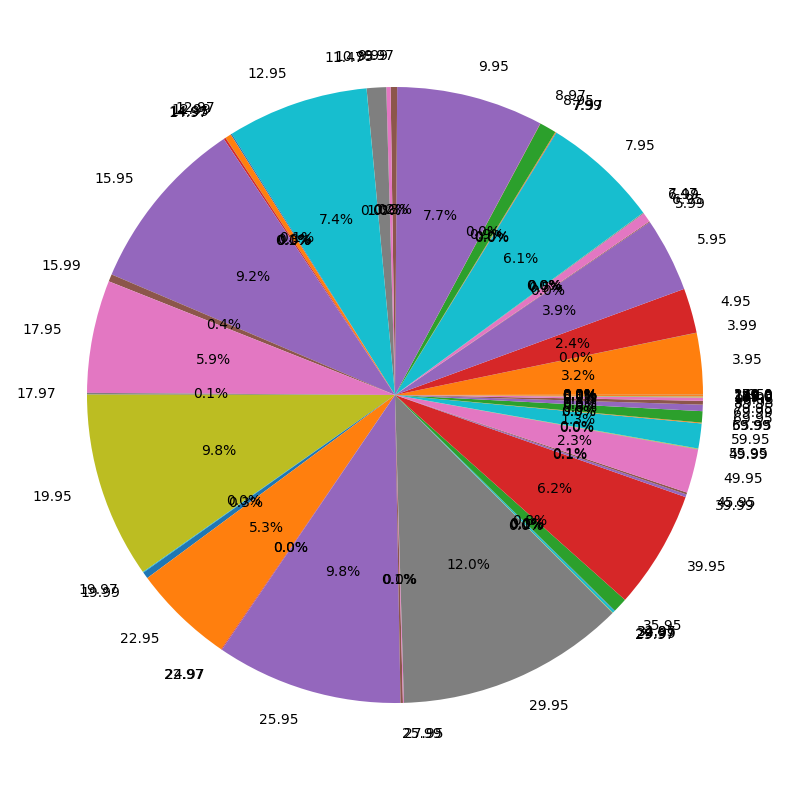

In [122]:
plt.figure(figsize=(10,10))
plt.pie(all_data_by_price['stock'], labels=all_data_by_price['price'], autopct='%1.1f%%')

In [128]:
all_data_by_price['stock'].mean()

3233866.8125

In [134]:
application_types_to_replace = []
for v in range(len(all_data_by_price['stock'])):
  if (all_data_by_price['stock'][v] < 3233866) :
    application_types_to_replace.append(all_data_by_price['index'][v])

# Replace in dataframe
for app in application_types_to_replace:
    all_data_by_price['stock'] = all_data_by_price['stock'].replace(app,"Other")

# Check to make sure binning was successful
all_data_by_price['stock'].value_counts()

36361.0       1
6665014.0     1
20256801.0    1
258314.0      1
103467.0      1
             ..
12220726.0    1
192608.0      1
20201275.0    1
81065.0       1
11052.0       1
Name: stock, Length: 64, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe51db78130>,
 [Text(1.0999998324556344, 0.0006071223736894276, '2.95'),
  Text(1.0942521213882623, 0.11230447380798098, '3.95'),
  Text(1.0772554246366834, 0.22253258208819449, '3.99'),
  Text(1.0578178912407625, 0.3016973797880029, '4.95'),
  Text(0.9787280951034593, 0.502086960451229, '5.95'),
  Text(0.9093300910974279, 0.6189659000500299, '5.99'),
  Text(0.8986298164868384, 0.6344008613809027, '6.95'),
  Text(0.8876557634408824, 0.6496670267376854, '6.99'),
  Text(0.886618655789166, 0.6510816839741482, '7.47'),
  Text(0.7454269939632754, 0.8089119832657168, '7.95'),
  Text(0.5760091230720642, 0.9371304552396916, '7.97'),
  Text(0.5739754369263455, 0.938377428226623, '7.99'),
  Text(0.5464047214721686, 0.954694652940364, '8.95'),
  Text(0.519246989821475, 0.9697332435063456, '8.97'),
  Text(0.2712409680244964, 1.0660339287588994, '9.95'),
  Text(-0.004032343622901625, 1.0999926091592194, '9.97'),
  Text(-0.023569049934773614, 1.0997474709610258, '9.

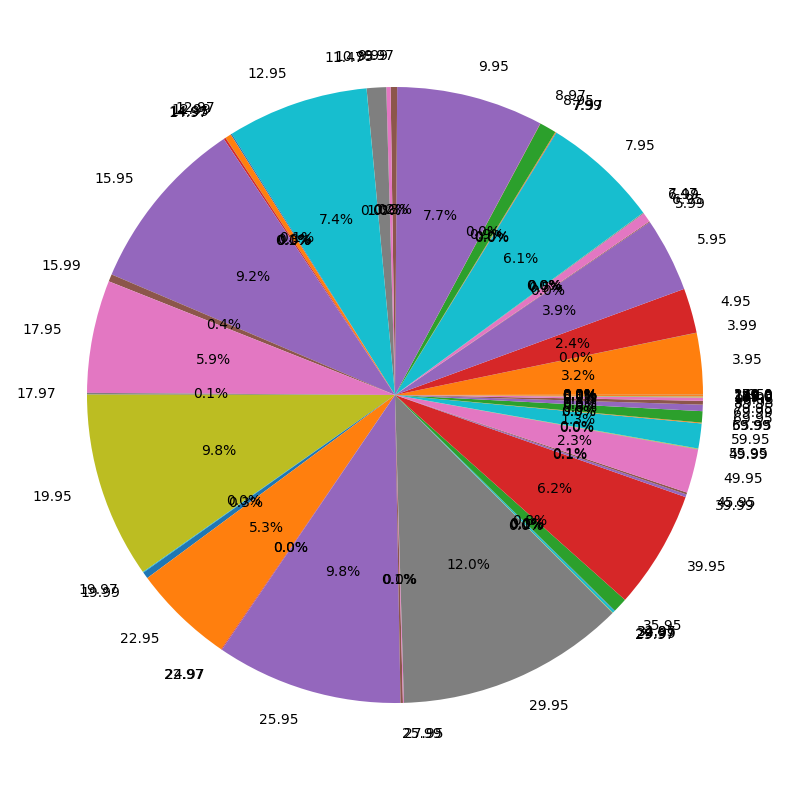

In [135]:
plt.figure(figsize=(10,10))
plt.pie(all_data_by_price['stock'], labels=all_data_by_price['price'], autopct='%1.1f%%')

In [136]:
all_data_by_price

index   price     sales      stock
0       2    2.95     916.0    36361.0
1       3    3.95  109999.0  6665014.0
2       4    3.99     693.0    17512.0
3       5    4.95   85297.0  4865667.0
4       6    5.95  143242.0  8057454.0
..    ...     ...       ...        ...
59     63  129.00     312.0    16879.0
60     64  139.00      71.0    13923.0
61     65  149.00    1194.0   143924.0
62     66  179.00      54.0      490.0
63     67  199.00      42.0    11052.0

[64 rows x 4 columns]